<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Import" data-toc-modified-id="0.-Import-1">0. Import</a></span></li><li><span><a href="#1.-Датасет" data-toc-modified-id="1.-Датасет-2">1. Датасет</a></span><ul class="toc-item"><li><span><a href="#1.1-Описание-признаков" data-toc-modified-id="1.1-Описание-признаков-2.1">1.1 Описание признаков</a></span></li><li><span><a href="#1.2-Создание-датасета" data-toc-modified-id="1.2-Создание-датасета-2.2">1.2 Создание датасета</a></span></li><li><span><a href="#1.3-Считывание-датасета" data-toc-modified-id="1.3-Считывание-датасета-2.3">1.3 Считывание датасета</a></span></li><li><span><a href="#1.4-Выбор-признаков" data-toc-modified-id="1.4-Выбор-признаков-2.4">1.4 Выбор признаков</a></span></li></ul></li><li><span><a href="#2.-AutoML" data-toc-modified-id="2.-AutoML-3">2. AutoML</a></span></li><li><span><a href="#3.-Модели" data-toc-modified-id="3.-Модели-4">3. Модели</a></span><ul class="toc-item"><li><span><a href="#3.1-LogisticRegression" data-toc-modified-id="3.1-LogisticRegression-4.1">3.1 LogisticRegression</a></span></li><li><span><a href="#3.2-LinearRegression" data-toc-modified-id="3.2-LinearRegression-4.2">3.2 LinearRegression</a></span></li><li><span><a href="#3.3-RandomForestClassifier" data-toc-modified-id="3.3-RandomForestClassifier-4.3">3.3 RandomForestClassifier</a></span></li><li><span><a href="#3.4-LGBMClassifier" data-toc-modified-id="3.4-LGBMClassifier-4.4">3.4 LGBMClassifier</a></span></li><li><span><a href="#3.5-XGBClassifier" data-toc-modified-id="3.5-XGBClassifier-4.5">3.5 XGBClassifier</a></span></li><li><span><a href="#3.6-CatBoost" data-toc-modified-id="3.6-CatBoost-4.6">3.6 CatBoost</a></span></li><li><span><a href="#3.7-NN" data-toc-modified-id="3.7-NN-4.7">3.7 NN</a></span></li></ul></li><li><span><a href="#4.-Результаты" data-toc-modified-id="4.-Результаты-5">4. Результаты</a></span><ul class="toc-item"><li><span><a href="#4.1-Таблица-результатов" data-toc-modified-id="4.1-Таблица-результатов-5.1">4.1 Таблица результатов</a></span></li><li><span><a href="#4.2-Настройка-лучшей-модели" data-toc-modified-id="4.2-Настройка-лучшей-модели-5.2">4.2 Настройка лучшей модели</a></span></li><li><span><a href="#4.3-Выводы" data-toc-modified-id="4.3-Выводы-5.3">4.3 Выводы</a></span></li></ul></li></ul></div>

# 0. Import

In [1]:
import pandas as pd, numpy as np, re, scipy.stats as stats
import seaborn as sns, matplotlib.pyplot as plt, plotly.express as px
from collections import Counter
from tqdm import tqdm, tqdm_notebook
from datetime import datetime

from sklearn import decomposition
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support, log_loss
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectPercentile
from mlxtend.feature_selection import SequentialFeatureSelector
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss, TomekLinks


import optuna


import warnings
warnings.filterwarnings('ignore')

# 1. Датасет

## 1.1 Описание признаков

TCS_CUSTOMER_ID	Идентификатор клиента	ID

BUREAU_CD	Код бюро, из которого получен счет	numeric

BKI_REQUEST_DATE	Дата, в которую был сделан запрос в бюро	date

CURRENCY	Валюта договора (ISO буквенный код валюты)	string

RELATIONSHIP	Тип отношения к договору	string
	1 - Физическое лицо	
	2 - Дополнительная карта/Авторизованный пользователь	
	4 - Совместный 	
	5 - Поручитель	
	9 - Юридическое лицо	
    
OPEN_DATE	Дата открытия договора	date

FINAL_PMT_DATE	Дата финального платежа (плановая)	date

TYPE	Код типа договора	string
	1 – Кредит на автомобиль	
	4 – Лизинг. Срочные платежи за наем/пользование транспортным средством, предприятием или оборудованием и т.п.	
	6 – Ипотека – ссудные счета, имеющие отношение к домам, квартирам и прочей недвижимости. Ссуда выплачивается циклично согласно договоренности до тех пор, пока она не будет полностью выплачена или возобновлена. 	
	7 – Кредитная карта 	
	9 – Потребительский кредит	
	10 – Кредит на развитие бизнеса	
	11 – Кредит на пополнение оборотных средств	
	12 – Кредит на покупку оборудования 	
	13 – Кредит на строительство недвижимости	
	14 – Кредит на покупку акций (например, маржинальное кредитование)	
	99 – Другой	
    
PMT_STRING_84M	Дисциплина (своевременность) платежей. Строка составляется из кодов состояний счета на моменты передачи банком данных по счету в бюро, первый символ - состояние на дату PMT_STRING_START, далее последовательно в порядке убывания дат.	string
	0 – Новый, оценка невозможна	
	X – Нет информации	
	1 – Оплата без просрочек	
	A – Просрочка от 1 до 29 дней	
	2 – Просрочка от 30 до 59 дней	
	3 – Просрочка от 60 до 89 дней	
	4 – Просрочка от 90 до 119 дней	
	5 – Просрочка более 120 дней	
	7 – Регулярные консолидированные платежи	
	8 – Погашение по кредиту с использованием залога	
	9 – Безнадёжный долг/ передано на взыскание/ пропущенный платеж	
    
STATUS	Статус договора	string
	00 – Активный	
	12 – Оплачен за счет обеспечения	
	13 – Счет закрыт	
	14 – Передан на обслуживание в другой банк	
	21 – Спор	
	52 – Просрочен	
	61 – Проблемы с возвратом	
    
OUTSTANDING	Оставшаяся непогашенная задолженность. Сумма в рублях по курсу ЦБ РФ	numeric

NEXT_PMT	Размер следующего платежа. Сумма в рублях по курсу ЦБ РФ	numeric

INF_CONFIRM_DATE	Дата подтверждения информации по счету	date

FACT_CLOSE_DATE	Дата закрытия счета (фактическая)	date

TTL_DELQ_5	Количество просрочек до 5 дней	numeric

TTL_DELQ_5_29	Количество просрочек от 5 до 29 дней	numeric

TTL_DELQ_30_59	Количество просрочек от 30 до 59 дней	numeric

TTL_DELQ_60_89	Количество просрочек от 60 до 89 дней	numeric

TTL_DELQ_30	Количество просрочек до 30 дней	numeric

TTL_DELQ_90_PLUS	Количество просрочек 90+ дней	numeric

PMT_FREQ	Код частоты платежей	string
	1 – Еженедельно	
	2 – Раз в две недели	
	3 – Ежемесячно	
	A - Раз в 2 месяца	
	4 – Поквартально	
	B - Раз в 4 месяца	
	5 – Раз в полгода	
	6 -  Ежегодно	
	7 – Другое	
    
CREDIT_LIMIT	Кредитный лимит. Сумма в рублях по курсу ЦБ РФ	numeric

DELQ_BALANCE	Текущая просроченная задолженность. Сумма в рублях по курсу ЦБ РФ	numeric

MAX_DELQ_BALANCE	Максимальный объем просроченной задолженности. Сумма в рублях по курсу ЦБ РФ	numeric

CURRENT_DELQ	Текущее количество дней просрочки	numeric

PMT_STRING_START	Дата начала строки PMT_STRING_84M	date

INTEREST_RATE	Процентная ставка по кредиту	numeric

CURR_BALANCE_AMT	Общая выплаченная сумма, включая сумму основного долга, проценты, пени и штрафы. Сумма в рублях по курсу ЦБ РФ	numeric

## 1.2 Создание датасета

In [2]:
# функция для преобразования дат (int -> datetime)
def get_time(time):
    if type(int(str(time)))==int:
        seconds = (int(time) - 25569) * 86400
        temp = datetime.utcfromtimestamp(seconds)
        return temp
        
    elif type(time.astype('int')) == np.int32 or numpy.int64:
        seconds = (int(time) - 25569) * 86400
        temp = datetime.utcfromtimestamp(seconds)
        return temp
    
    else:
        return np.nan

vget_time = np.vectorize(get_time)

# функция для поиска количества повторений
def count_freq(df: pd.DataFrame, type_to_count: 'str') -> pd.DataFrame:

    freq_df = pd.DataFrame(
        columns=[f'{type_to_count.upper()}_freq_type_{ttype}' for ttype in set(df[type_to_count])],
        index=pd.Index(set(df['tcs_customer_id']))
    ).fillna(0)

    temp_df = df[['tcs_customer_id', type_to_count]]
    for _, tcs_id in enumerate(tqdm_notebook(set(temp_df['tcs_customer_id']))):

        count_val = temp_df[temp_df['tcs_customer_id'] == tcs_id][type_to_count]
        dict_val = dict(Counter(count_val))

        for key in dict_val.keys():
            freq_df.loc[tcs_id, f'{type_to_count.upper()}_freq_type_{key}'] = dict_val.get(key)
                               
    return freq_df

In [3]:
# читаем датасет
df_read = pd.read_csv('new/SAMPLE_ACCOUNTS.csv', sep=';', decimal=',',
                dtype={'pmt_freq': str, 'fact_close_date':str})


id_accounts = pd.read_csv('SAMPLE_CUSTOMERS.csv', sep=';')
id_accounts.rename(columns={'bad':'default'}, inplace=True)

print('Размер датасета:', df_read.shape)
print('Количество заемщиков:', id_accounts.shape[0])

# у нас есть 2 таблицы - сам датасет и указание на train/test.
# объединим их в одну таблицу и удалим данные с пометкой test (потому что отсутствует таргет)

df = df_read.merge(id_accounts, how='left', on='tcs_customer_id')
df = df[df.sample_type == 'train'].drop('sample_type', axis=1).reset_index(drop=True)
df['default'] = df['default'].astype(int)

print(df.shape)
df.head()

Размер датасета: (280942, 28)
Количество заемщиков: 50000
(193338, 29)


,tcs_customer_id,bureau_cd,bki_request_date,inf_confirm_date,type,status,open_date,final_pmt_date,fact_close_date,credit_limit,...,ttl_delq_60_89,ttl_delq_90_plus,pmt_string_start,pmt_string_84m,delq_balance,max_delq_balance,interest_rate,pmt_freq,relationship,default
0,2,1,40665,40618,9,13,40472,40618.0,40618,7551,...,0,0,40617.0,11111,0.0,0.0,0,3,1,0
1,2,3,40665,40661,9,0,40652,40958.0,NaN,21186,...,0,0,40687.0,X1,0.0,0.0,0,3,1,0
2,2,3,40665,40661,9,13,40472,40618.0,40602,7551,...,0,0,40602.0,11111,0.0,0.0,0,3,1,0
3,3,2,40637,40609,7,0,40604,NaN,NaN,20000,...,0,0,40605.0,X1,0.0,0.0,0,7,1,1
4,3,1,40637,40069,9,13,39647,40068.0,40068,22694,...,0,0,40069.0,"1,11111E+13",0.0,0.0,0,3,1,1


В датасете несколько строк может относиться к одному клиенту. Для того, чтобы предсказывать именно дефолт клиента, а не один взятый кредит (строка), требуется переделать датасет:

**Модель нового датасета:**
* Каждого клиента переводим в кластер (делаем группу клиентов), обобщая его прошлые кредиты
* Для колонки в старом датасете создаем новую, сгрупированную по ID клиента


**Пример (такой вид имеет оригинальный датасет):**
*status - категориальная переменная

|id |  credit_limit | interest_rate | status | default|
|:--|--------------:|--------------:|-------:|-------:|
|1  |  10_000       | 10            | 99     | 0      |
|1  |  20_000       | 15            | 13     | 0      | 
|2  |  100_000      | 20            | 1      | 1      |

**Данные выше преобразуются в следующий формат:**

|id |  credit_limit | interest_rate | frequency_99 | frequency_13 | frequency_1 | default|
|:--|--------------:|--------------:|-------------:|-------------:|------------:|-------:|
|1  |15_000         |12.5           | 1            | 1            | 0           | 0      |
|2  |100_000        |20             | 0            | 0            | 1           | 1      |

В данном примере мы брали среднее по credit_limit и interest_rate. Для таких факторов, как status или type,
которые являются категориальными, была реализована функция, которая считает количество повторений и заносит их
в таблицу. frequency_99 - частота договора со статусом 99 у клиента с ID 1, то есть у клиента был всего один кредит
со статусом 99, поэтому ставится 1. Также был один кредит со статусом 13 (колонка отображает число таких кредитов: если было бы 2 кредита со статусом 13 - была бы цифра 2). Аналогично будут добавлены в новую таблицу такие факторы.


>
> Итоговый датасет будет следующим:
> * Для каждого категориального признака посчитаем его частоту у каждого клиента
> * Для числовых признаков добавим среднее, медиану, сумму (не для всех)
> * Для дат посчитаем кредитную историю - число дней, месяец и лет
> * После этого можно будет строить модели не для предсказания дефолта конкретного **счета**,
а для предсказания дефолта **клиента**

In [4]:
%%time
start_time = datetime.now()

print('0. Start creating df...', f' || TIME: {datetime.now() - start_time} \n')
df_res = pd.DataFrame(index=pd.Index(set(df.tcs_customer_id)))



print('1. Add status...', f' || TIME: {datetime.now() - start_time}')
status_freq_df = count_freq(df=df, type_to_count='status')
df_res = pd.concat([df_res, status_freq_df], axis=1)



print('2. Add type...', f' || TIME: {datetime.now() - start_time}')
type_freq_df = count_freq(df=df, type_to_count='type')
df_res = pd.concat([df_res, type_freq_df], axis=1)



print('3. Add bureau_cd...', f' || TIME: {datetime.now() - start_time} \n')
df_res['bureau_cd'] = df.groupby('tcs_customer_id')['bureau_cd'] \
                      .apply(lambda x: Counter(x).most_common()[0][0]) \
                      .astype(int)



print('4. Add mean/ median of credit_limit...', f' || TIME: {datetime.now() - start_time} \n')
df_res['credit_limit_mean'] = df[['tcs_customer_id', 'credit_limit']] \
                              .groupby('tcs_customer_id')['credit_limit'].mean()

df_res['credit_limit_median'] = df[['tcs_customer_id', 'credit_limit']] \
                                .groupby('tcs_customer_id')['credit_limit'].median()




print('5. Add default...', f' || TIME: {datetime.now() - start_time} \n')
df_res['default'] = df[['tcs_customer_id', 'default']] \
                    .groupby('tcs_customer_id')['default'].mean().astype(int)




print('6. Add relationship...', f' || TIME: {datetime.now() - start_time}')
relationship_freq_df = count_freq(df=df, type_to_count='relationship')
df_res = pd.concat([df_res, relationship_freq_df], axis=1)




print('7. Add mean/ median of interest_rate...', f' || TIME: {datetime.now() - start_time} \n')
df_res['interest_rate_mean'] = df[['tcs_customer_id', 'interest_rate']] \
                               .groupby('tcs_customer_id')['interest_rate'].mean()

df_res['interest_rate_median'] = df[['tcs_customer_id', 'interest_rate']] \
                                .groupby('tcs_customer_id')['interest_rate'].median()




print('8. Add mean/ median/ sum of all ttl_delq...', 
      f' || TIME: {datetime.now() - start_time} \n')
cols_ttl = ['ttl_delq_5', 'ttl_delq_5_29', 'ttl_delq_30', 'ttl_delq_30_59', 
            'ttl_delq_60_89', 'ttl_delq_90_plus']
for col in cols_ttl:
    df_res[col] = df[['tcs_customer_id', col]].groupby('tcs_customer_id')[col].sum()
    df_res[col+'_mean'] = df[['tcs_customer_id', col]].groupby('tcs_customer_id')[col].mean()
    df_res[col+'_sum'] = df[['tcs_customer_id', col]].groupby('tcs_customer_id')[col].median()

    
    
    
print('9. Add mean/ median/ sum of max_delq_balance...', f' || TIME: {datetime.now() - start_time} \n')    
df_res['max_delq_balance_mean'] = df[['tcs_customer_id', 'max_delq_balance']] \
                                  .groupby('tcs_customer_id')['max_delq_balance'].mean()
df_res['max_delq_balance_median'] = df[['tcs_customer_id', 'max_delq_balance']] \
                                    .groupby('tcs_customer_id')['max_delq_balance'].median()
df_res['max_delq_balance_sum'] = df[['tcs_customer_id', 'max_delq_balance']] \
                                 .groupby('tcs_customer_id')['max_delq_balance'].sum()
    
    
    
print('10. Add mean/ median/ sum of max_delq_balance...', f' || TIME: {datetime.now() - start_time} \n') 
df_res['delq_balance_mean'] = df[['tcs_customer_id', 'delq_balance']] \
                                  .groupby('tcs_customer_id')['delq_balance'].mean()
df_res['delq_balance_median'] = df[['tcs_customer_id', 'delq_balance']] \
                                    .groupby('tcs_customer_id')['delq_balance'].median()
df_res['delq_balance_sum'] = df[['tcs_customer_id', 'delq_balance']] \
                                 .groupby('tcs_customer_id')['delq_balance'].sum()    
    
    
    
print('10. Add dates...', f' || TIME: {datetime.now() - start_time} \n') 
dates = pd.DataFrame(df.groupby('tcs_customer_id')['open_date'].min().values, columns=['min'])
dates['max'] =  df.groupby('tcs_customer_id')['open_date'].max().values

dates['min'] = vget_time(dates['min'])
dates['max'] = vget_time(dates['max'])
dates['diff_days'] = (dates['max'] - dates['min']).dt.days

df_res['diff_days'] = dates['diff_days'].values
df_res['diff_year'] = (df_res['diff_days'] / 365).astype('int64')
df_res['diff_month'] = (df_res['diff_days'] / 30).astype('int64') 
    
    
    
    
print('11. Add mean/ median/ sum of curr_balance_amt...', f' || TIME: {datetime.now() - start_time} \n') 
df_res['curr_balance_amt_mean'] = df[['tcs_customer_id', 'curr_balance_amt']] \
                                  .groupby('tcs_customer_id')['curr_balance_amt'].mean()
df_res['curr_balance_amt_mean'].fillna(df_res['curr_balance_amt_mean'].mean(), inplace=True)

df_res['curr_balance_amt_median'] = df[['tcs_customer_id', 'curr_balance_amt']] \
                                    .groupby('tcs_customer_id')['curr_balance_amt'].median()
df_res['curr_balance_amt_median'].fillna(df_res['curr_balance_amt_median'].median(), inplace=True)

df_res['curr_balance_amt_sum'] = df[['tcs_customer_id', 'curr_balance_amt']] \
                                 .groupby('tcs_customer_id')['curr_balance_amt'].sum()      
    

print('\033[1m' + 'End \n' + f'TOTAL TIME: {datetime.now() - start_time}' + '\033[0m')
print('====================================================== \n\n')

print('Count of default:', Counter(df_res.default))

print(f'Shape new df: {df_res.shape} \n')

0. Start creating df...  || TIME: 0:00:00 

1. Add status...  || TIME: 0:00:00.022935


  0%|          | 0/35031 [00:00<?, ?it/s]

2. Add type...  || TIME: 0:00:19.570675


  0%|          | 0/35031 [00:00<?, ?it/s]

3. Add bureau_cd...  || TIME: 0:00:39.219013 

4. Add mean/ median of credit_limit...  || TIME: 0:00:39.877377 

5. Add default...  || TIME: 0:00:39.900864 

6. Add relationship...  || TIME: 0:00:39.910841


  0%|          | 0/35031 [00:00<?, ?it/s]

7. Add mean/ median of interest_rate...  || TIME: 0:00:57.696163 

8. Add mean/ median/ sum of all ttl_delq...  || TIME: 0:00:57.718143 

9. Add mean/ median/ sum of max_delq_balance...  || TIME: 0:00:57.904605 

10. Add mean/ median/ sum of max_delq_balance...  || TIME: 0:00:57.936520 

10. Add dates...  || TIME: 0:00:57.965466 

11. Add mean/ median/ sum of curr_balance_amt...  || TIME: 0:00:58.041239 

End 
TOTAL TIME: 0:00:58.076146


Count of default: Counter({0: 30733, 1: 4298})
Shape new df: (35031, 59) 

CPU times: total: 58.2 s
Wall time: 58.1 s


In [5]:
print('Количество колонок - ', len(df_res.columns))
print('Размер датасета - ', df_res.shape)
# всего клинетов было 50_000 -> убрали test-клиентов (на них нет ответов) -> 35_031 осталось

# сам алгоритм создания нового датасета написан не оптимизированно, чтобы было видно, 
# какие колонки добавляются

Количество колонок -  59
Размер датасета -  (35031, 59)


Новый датасет состоит из:

1) tcs_customer_id каждого клиента

2) Частота колонки status

3) Частота колонки type

4) mean/ median of credit_limit

5) значение default

6) частота колонки relationship

7)  mean/ median of interest_rate

8)  mean/ median/ sum of all ttl_delq

9) mean/ median/ sum of max_delq_balance

10)  mean/ median/ sum of delq_balance

11)  добавлена колонка времени кредитной истории в днях, месяцах, годах

12)  mean/ median/ sum of curr_balance_amt

In [44]:
df_res.isna().sum()

STATUS_freq_type_0          0
STATUS_freq_type_12         0
STATUS_freq_type_13         0
STATUS_freq_type_14         0
STATUS_freq_type_52         0
STATUS_freq_type_21         0
STATUS_freq_type_61         0
TYPE_freq_type_1            0
TYPE_freq_type_99           0
TYPE_freq_type_4            0
TYPE_freq_type_6            0
TYPE_freq_type_7            0
TYPE_freq_type_9            0
TYPE_freq_type_10           0
TYPE_freq_type_11           0
TYPE_freq_type_12           0
TYPE_freq_type_13           0
TYPE_freq_type_14           0
bureau_cd                   0
credit_limit_mean           0
credit_limit_median         0
default                     0
RELATIONSHIP_freq_type_1    0
RELATIONSHIP_freq_type_2    0
RELATIONSHIP_freq_type_4    0
RELATIONSHIP_freq_type_5    0
RELATIONSHIP_freq_type_9    0
interest_rate_mean          0
interest_rate_median        0
ttl_delq_5                  0
ttl_delq_5_mean             0
ttl_delq_5_sum              0
ttl_delq_5_29               0
ttl_delq_5

In [46]:
df_res.dtypes

STATUS_freq_type_0            int64
STATUS_freq_type_12           int64
STATUS_freq_type_13           int64
STATUS_freq_type_14           int64
STATUS_freq_type_52           int64
STATUS_freq_type_21           int64
STATUS_freq_type_61           int64
TYPE_freq_type_1              int64
TYPE_freq_type_99             int64
TYPE_freq_type_4              int64
TYPE_freq_type_6              int64
TYPE_freq_type_7              int64
TYPE_freq_type_9              int64
TYPE_freq_type_10             int64
TYPE_freq_type_11             int64
TYPE_freq_type_12             int64
TYPE_freq_type_13             int64
TYPE_freq_type_14             int64
bureau_cd                     int32
credit_limit_mean           float64
credit_limit_median         float64
default                       int32
RELATIONSHIP_freq_type_1      int64
RELATIONSHIP_freq_type_2      int64
RELATIONSHIP_freq_type_4      int64
RELATIONSHIP_freq_type_5      int64
RELATIONSHIP_freq_type_9      int64
interest_rate_mean          

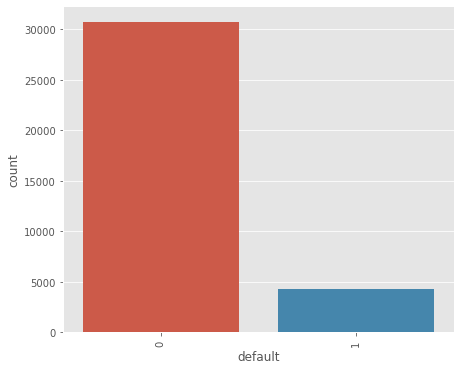

0    30733
1     4298
Name: default, dtype: int64

In [45]:
# распределение таргета

plt.figure(figsize=(7, 6))
sns.countplot(x='default', data=df_res)
plt.xticks(rotation=90)
plt.show()

df['default'].value_counts()

In [41]:
# сохраняем новый датасет
df_res.to_csv('preprocessed_df.csv', sep=';', header=True, index=False)

## 1.3 Считывание датасета

In [2]:
df = pd.read_csv('preprocessed_df.csv', sep=';')

In [3]:
# Удаляем выбросы с помощью Z-score
df_pr = pd.read_csv('preprocessed_df.csv', sep=';')

z = np.abs(stats.zscore(df))
data_clean = df[(z < 3).all(axis=1)]

print(f'размерность оригинального датасета {df_pr.shape}')
print(f'размерность после предобработки {data_clean.shape}')
print()
print(Counter(data_clean.default))
data_clean.head()

размерность оригинального датасета (35031, 59)
размерность после предобработки (24018, 59)

Counter({0: 20899, 1: 3119})


,STATUS_freq_type_0,STATUS_freq_type_12,STATUS_freq_type_13,STATUS_freq_type_14,STATUS_freq_type_52,STATUS_freq_type_21,STATUS_freq_type_61,TYPE_freq_type_1,TYPE_freq_type_99,TYPE_freq_type_4,...,max_delq_balance_sum,delq_balance_mean,delq_balance_median,delq_balance_sum,diff_days,diff_year,diff_month,curr_balance_amt_mean,curr_balance_amt_median,curr_balance_amt_sum
0,1,0,2,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,180,0,6,3870.000000,3870.0,7740.0
1,3,0,1,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,957,2,31,0.000000,0.0,0.0
2,6,0,9,0,0,0,0,0,1,0,...,27.00,0.0,0.0,0.0,1868,5,62,8111.833333,7258.0,48671.0
3,0,0,1,0,0,0,0,0,0,0,...,997.47,0.0,0.0,0.0,0,0,0,55681.049046,13926.0,0.0
4,1,0,5,0,0,0,0,0,0,0,...,6537.00,0.0,0.0,0.0,365,1,12,22704.000000,22704.0,45408.0


## 1.4 Выбор признаков

In [4]:
%%time

'Определим переменные, которые сильнее всего влияют на default и их оптимальное количество'

y = data_clean.default
x = data_clean.drop('default', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25)


log = Pipeline(steps=[('sc', MinMaxScaler()),
                              ('sl', SelectKBest(score_func=f_classif, k=2)),
                              ('model', LogisticRegression())])

log.fit(x_train, y_train)
                       
param_grid = {'sl__k': np.arange(2, len(data_clean.columns), 2)}     
                
search_log = GridSearchCV(log, 
                          param_grid, 
                          cv=3, 
                          n_jobs=-1, 
                          scoring='roc_auc', 
                          refit=True, 
                          verbose=10)
                
    
search_log.fit(x_train, y_train)

print()
print(f'Оптимальное количество параметров - {search_log.best_estimator_[1]}')
print()

Fitting 3 folds for each of 29 candidates, totalling 87 fits

Оптимальное количество параметров - SelectKBest(k=44)

CPU times: total: 734 ms
Wall time: 4.67 s


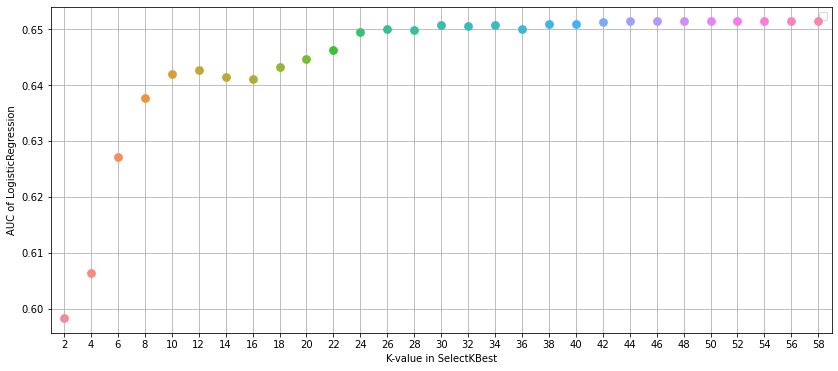

In [5]:
# график точности от количества выбранных факторов
plt.subplots(figsize=(14, 6))

sns.pointplot(x=search_log.cv_results_['param_sl__k'], 
              y=search_log.cv_results_['mean_test_score'],
              hue=search_log.cv_results_['param_sl__k'])

plt.legend(np.arange(2, len(data_clean.columns), 2), 'upper')
plt.xlabel('K-value in SelectKBest')
plt.ylabel('AUC of LogisticRegression')
plt.grid(True)
plt.show()

In [6]:
# выбираем оптимальное количество колонок
select = SelectKBest(score_func=f_classif, k=34)
best = select.fit_transform(x, y)

columns_imp=x.columns[select.get_support()].to_list()
columns_imp

['STATUS_freq_type_0',
 'STATUS_freq_type_13',
 'STATUS_freq_type_52',
 'TYPE_freq_type_1',
 'TYPE_freq_type_7',
 'TYPE_freq_type_9',
 'bureau_cd',
 'credit_limit_mean',
 'credit_limit_median',
 'RELATIONSHIP_freq_type_1',
 'interest_rate_mean',
 'interest_rate_median',
 'ttl_delq_5',
 'ttl_delq_5_mean',
 'ttl_delq_5_29',
 'ttl_delq_5_29_mean',
 'ttl_delq_5_29_sum',
 'ttl_delq_30',
 'ttl_delq_30_sum',
 'ttl_delq_30_59_mean',
 'ttl_delq_30_59_sum',
 'ttl_delq_60_89_mean',
 'ttl_delq_60_89_sum',
 'ttl_delq_90_plus',
 'ttl_delq_90_plus_mean',
 'ttl_delq_90_plus_sum',
 'max_delq_balance_mean',
 'max_delq_balance_median',
 'diff_days',
 'diff_year',
 'diff_month',
 'curr_balance_amt_mean',
 'curr_balance_amt_median',
 'curr_balance_amt_sum']

In [7]:
# нормируем данные
for ind, val in enumerate(data_clean[columns_imp]):
    data_clean[val] = np.log1p(data_clean[val])

# 2. AutoML

In [134]:
# !pip uninstall scikit-learn -y
# !pip uninstall numpy -y
# !pip install scikit-learn==0.23.2
# !pip install numpy==1.20
# !pip install pycaret

# import pycaret
# from pycaret.classification import *
# from pycaret.utils import enable_colab
# enable_colab()

In [135]:
# import h2o
# from h2o.automl import H2OAutoML

Воспользуемся библиотекой LightAutoML для нахождения предварительной оценки по моделям.
В данном случае, не используется библиотека PyCaret, которая была в прошлый раз, так как не показывает высокую производительность на больших датасетах

In [8]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [9]:
# Считывание датасета, небольшая очистка, удаление столбцов с id
df_auto = pd.read_csv('preprocessed_df.csv', sep=';')

print(('df shape - {}'.format(df_auto.shape)))


xx = df_auto.drop('default', axis=1)
yy = df_auto.default

imbalance_auto = SMOTETomek(sampling_strategy='auto', n_jobs=6)
x_imb_auto, y_imb_auto = imbalance_auto.fit_resample(xx, yy)

x_train_auto, x_test_auto, y_train_auto, y_test_auto = train_test_split(x_imb_auto, y_imb_auto,
                                                    stratify=y_imb_auto, test_size=0.25)

x_train_auto['default'] = y_train_auto
x_train_auto.shape, y_train_auto.shape, x_test_auto.shape, y_test_auto.shape

df shape - (35031, 59)


((43879, 59), (43879,), (14627, 58), (14627,))

In [10]:
# настройка модели

roles = {
    'target': 'default',
}

automl = TabularAutoML(
    task=Task('binary', metric = 'auc'),
    timeout=60*3,
    cpu_limit=6,
    reader_params={'n_jobs': 6, 'cv': 5, 'random_state': 101},
    general_params = {'use_algos': [['linear_l2', 'lgb', 'cb', 'lgb_tuned']]},
)

rd = ReportDeco('TabReport2')
automl_rd = rd(automl)

models = automl_rd.fit_predict(x_train_auto, roles=roles, verbose=1)

[12:22:18] Stdout logging level is INFO.
[12:22:18] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[12:22:18] Task: binary

[12:22:18] Start automl preset with listed constraints:
[12:22:18] - time: 180.00 seconds
[12:22:18] - CPU: 6 cores
[12:22:18] - memory: 16 GB

[12:22:18] Train data shape: (43879, 59)

[12:22:22] Layer 1 train process start. Time left 175.67 secs
[12:22:24] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[12:22:35] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.9357531706272837
[12:22:35] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[12:22:35] Time left 162.61 secs

[12:22:38] Selector_LightGBM fitting and predicting completed
[12:22:41] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[12:22:56] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.951811684033333
[12:22:56] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[12:22:56] Start hyperparameters optimization for Lvl_0

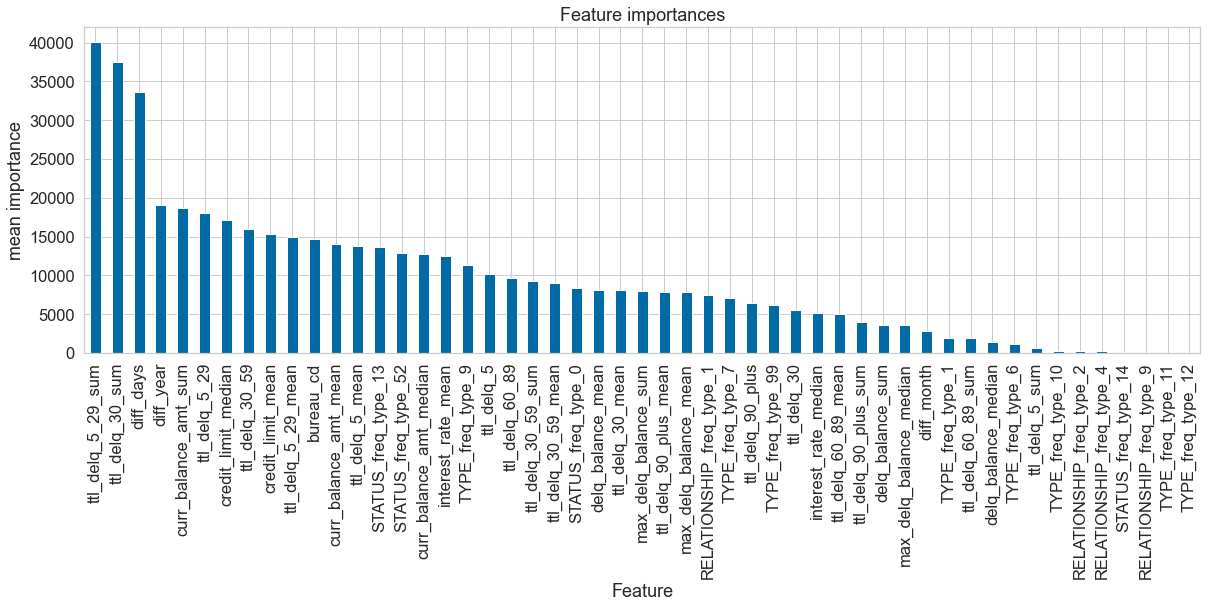

In [27]:
# feature importances
plt.style.use('tableau-colorblind10')
imps = automl_rd.model.get_feature_scores()
ax = imps.set_index('Feature')['Importance'].plot.bar(figsize=(20, 6))
ax.set_title('Feature importances')
ax.set_ylabel('mean importance')
plt.show()

In [28]:
imps.head(10) # top 10 by importance

,Feature,Importance
0,ttl_delq_5_29_sum,40052.675446
1,ttl_delq_30_sum,37466.173610
2,diff_days,33624.765519
3,diff_year,19009.337200
4,curr_balance_amt_sum,18723.371205
5,ttl_delq_5_29,17993.110756
6,credit_limit_median,17150.332214
7,ttl_delq_30_59,15954.858116
8,credit_limit_mean,15277.297608
9,ttl_delq_5_29_mean,14926.933203


In [29]:
preds = automl.predict(x_test_auto)

print(f'AUC score on train: {roc_auc_score(y_train_auto.values, models.data[:, 0])}')
print(f'GINI score on train: {roc_auc_score(y_train_auto.values, models.data[:, 0])*2-1}')
print()
print(f'AUC score on test: {roc_auc_score(y_test_auto.values, preds.data[:, 0])}')
print(f'GINI score on test: {roc_auc_score(y_test_auto.values, preds.data[:, 0])*2-1}')

AUC score on train: 0.953295368200625
GINI score on train: 0.90659073640125

AUC score on test: 0.9534124859812471
GINI score on test: 0.9068249719624941


In [30]:
# финальная модель automl
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.30768 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.69232 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) 


In [ ]:
# было обучено 2 модели - с исправлением имбаланса классов и без
# 0.71 AUC с имбалансным распределением таргета
# 0.95 AUC cо сбалансированным распределением

# 3. Модели

In [32]:
# функция для оценки моделей

def get_report(pipe, x_test, y_test):
    
    predictions = pipe.predict(x_test)
    predictions = np.round(predictions.ravel(), 0)

    roc_auc_scores_pipe = roc_auc_score(y_test, pipe.predict_proba(x_test)[:, 1])
    gini = (2 * roc_auc_scores_pipe) - 1
    
    print('y_test - ', Counter(y_test))
    print('predictions - ', Counter(predictions))
    print()
    print(f'roc_auc_score - {round(roc_auc_scores_pipe, 4)}')
    print('Gini - ', round(gini, 4))
    print()
    print((classification_report(y_test, predictions)))

In [110]:
%%time

# исправляем дисбаланс классов с помощью создания дополнительных данных
# и выбранных признаков

data_clean=data_clean[columns_imp+['default']]
data_clean.dropna(axis=0, inplace=True)
data_clean.drop_duplicates(inplace=True)

y = data_clean.default
x = data_clean.drop('default', axis=1)

# imbalance = NearMiss(sampling_strategy='auto', n_jobs=6)
imbalance = SMOTETomek(sampling_strategy='auto', n_jobs=6)
x_imb, y_imb = imbalance.fit_resample(x, y)

x_imb.shape, y_imb.shape

CPU times: total: 10.4 s
Wall time: 1.82 s


((39878, 34), (39878,))

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x_imb, y_imb, stratify=y_imb, test_size=0.25, )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29908, 34), (29908,), (9970, 34), (9970,))

In [112]:
from sklearn.preprocessing import PolynomialFeatures 
# для некоторых моделей добавим PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_p = poly.fit_transform(x_train)
x_test_p = poly.fit_transform(x_test)

x_train_p = MinMaxScaler().fit_transform(x_train_p)
x_test_p = MinMaxScaler().fit_transform(x_test_p)

x_train_p = pd.DataFrame(x_train_p, columns=poly.get_feature_names_out())
x_test_p = pd.DataFrame(x_test_p, columns=poly.get_feature_names_out())

## 3.1 LogisticRegression

In [109]:
# для улучшения показателей линейной модели, признаки должны быть линейно зависимы с таргетом
# выделим наиболее значимые признаки с помощью корреляции

In [115]:
corr = pd.concat([x_train, y_train], axis=1).corr()

<AxesSubplot:>

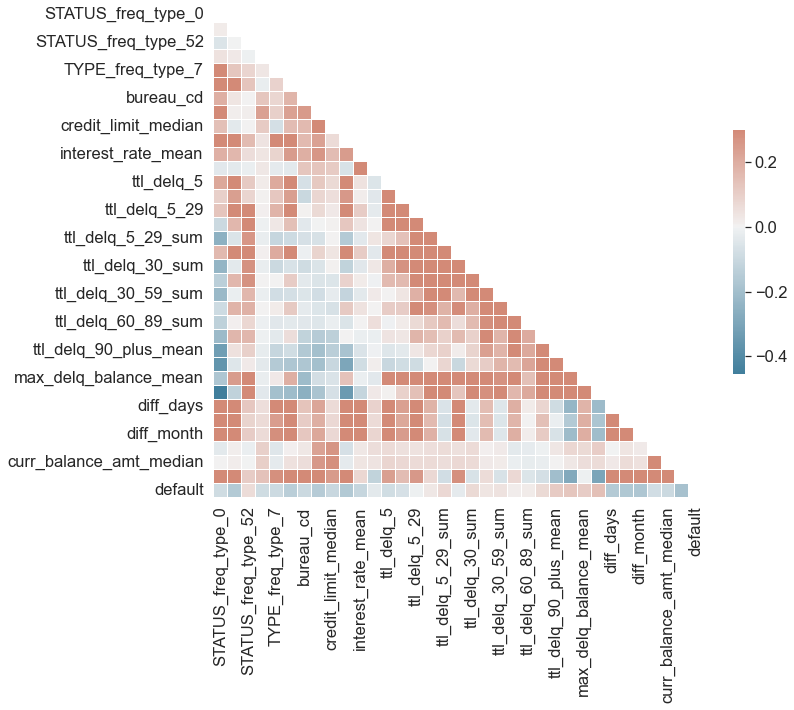

In [116]:
corr = pd.concat([x_train, y_train], axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

In [117]:
lin_columns = corr['default'][abs(corr['default'])>=0.15].index[:-1]

lin_x_train = x_train_p[lin_columns]
lin_x_test = x_test_p[lin_columns]
lin_x_train.columns

Index(['STATUS_freq_type_13', 'credit_limit_mean', 'RELATIONSHIP_freq_type_1',
       'diff_days', 'diff_year', 'diff_month', 'curr_balance_amt_sum'],
      dtype='object')

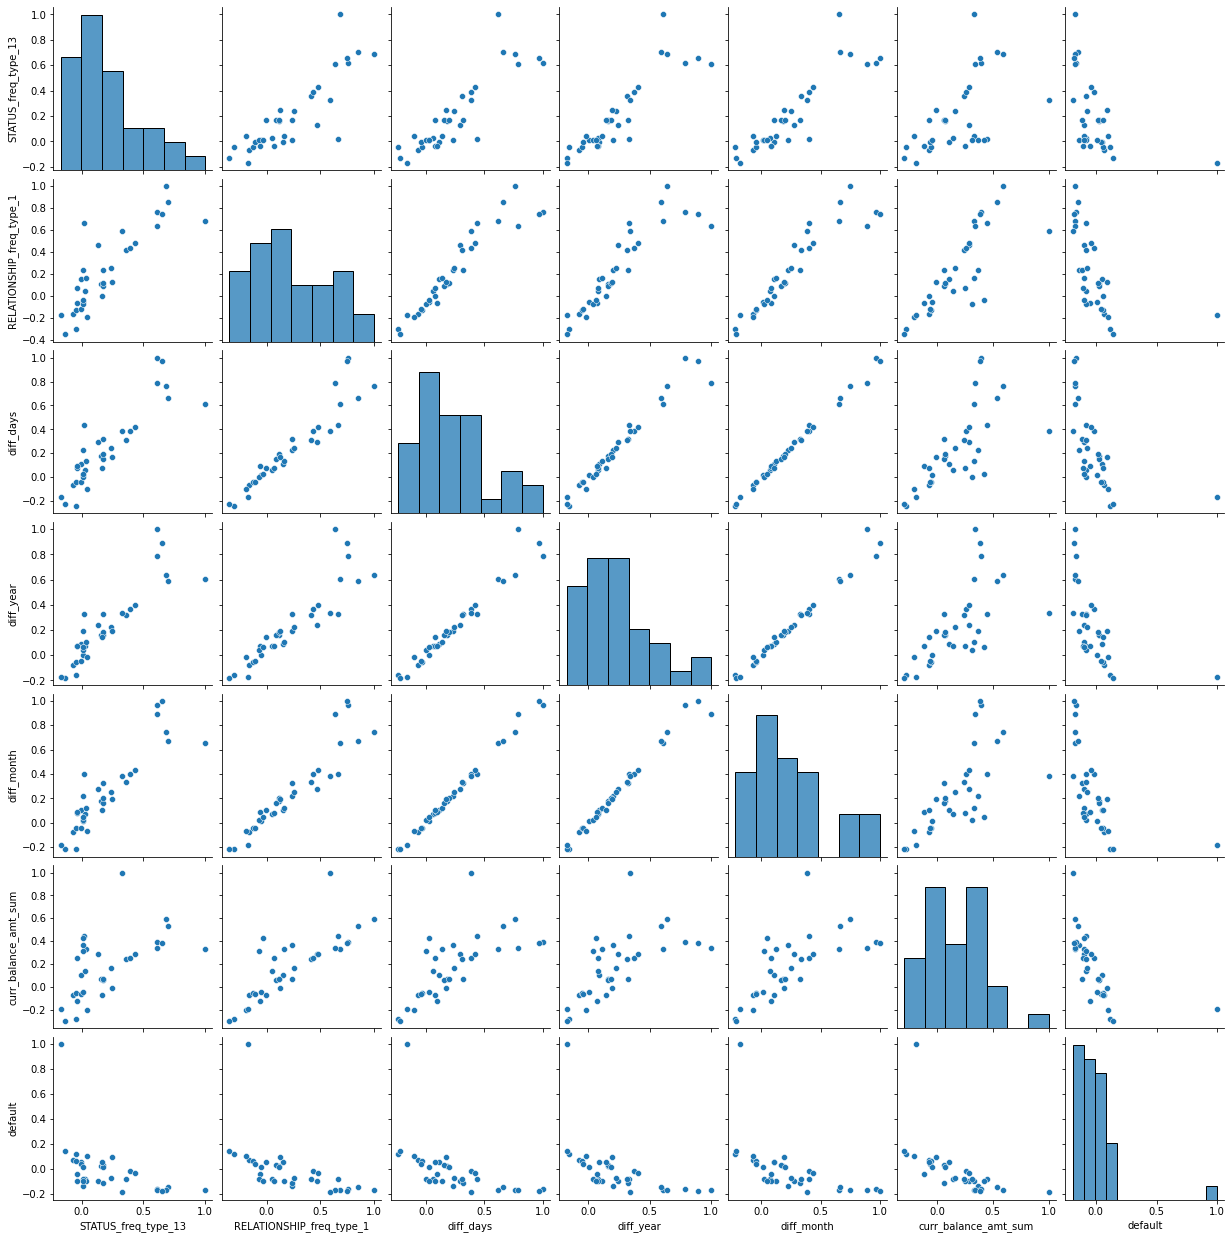

In [136]:
sns.pairplot(corr[lin_columns.tolist() + ['default']])
# коррелируемых с таргетом признаков  нет, есть коллинеарные признаки

In [118]:
poly = PolynomialFeatures(degree=2)
lin_x_train = poly.fit_transform(x_train)
lin_x_test = poly.fit_transform(x_test)

lin_x_train = pd.DataFrame(lin_x_train, columns=poly.get_feature_names_out())
lin_x_test = pd.DataFrame(lin_x_test, columns=poly.get_feature_names_out())

pipe_logreg = Pipeline(steps=[('sc', MinMaxScaler()), 
                              ('model', LogisticRegression(max_iter=300, 
                                                           solver='lbfgs',
                                                           C=500,
                                                           tol=0.1))])
pipe_logreg.fit(lin_x_train, y_train)

get_report(pipe=pipe_logreg, x_test=lin_x_test, y_test=y_test)
print()

y_test -  Counter({0: 4985, 1: 4985})
predictions -  Counter({1: 5100, 0: 4870})

roc_auc_score - 0.8204
Gini -  0.6408

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      4985
           1       0.74      0.75      0.74      4985

    accuracy                           0.74      9970
   macro avg       0.74      0.74      0.74      9970
weighted avg       0.74      0.74      0.74      9970




In [48]:
cv_pipe_logreg = cross_val_predict(pipe_logreg,
                                   cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                   X=lin_x_train,
                                   y=y_train,
                                   verbose=1,
                                   n_jobs=-1,
                                   method='predict_proba')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.7s finished


In [49]:
print(f'auc score = {roc_auc_score(y_train, cv_pipe_logreg[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_train, cv_pipe_logreg[:, 1])) - 1 :.5f}')

auc score = 0.81680
Gini      = 0.63360


Text(0, 0.5, 'Mean importance')

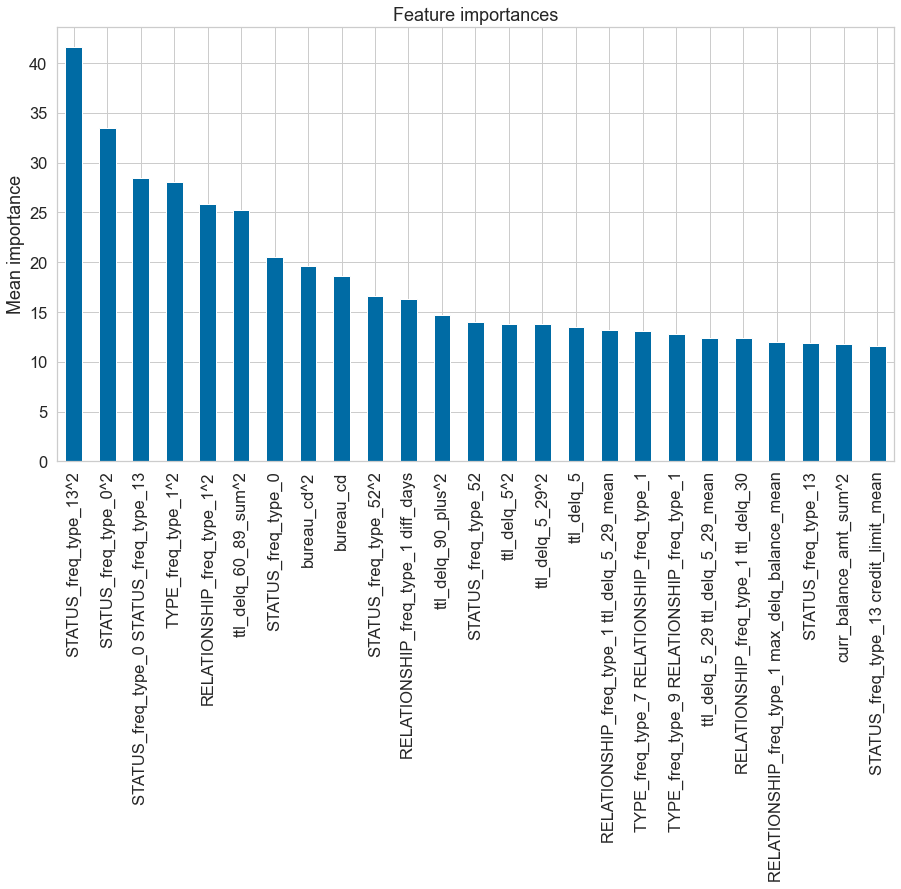

In [40]:
plt.style.use('tableau-colorblind10')
log_importances = pd.Series(abs(pipe_logreg[-1].coef_[0]), 
                            index=lin_x_train.columns).sort_values(0, ascending=False)[:25]

fig, ax = plt.subplots(figsize=(15,8))
log_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean importance')

In [41]:
pd.DataFrame(log_importances).head(10)

,0
STATUS_freq_type_13^2,41.579590
STATUS_freq_type_0^2,33.452685
STATUS_freq_type_0 STATUS_freq_type_13,28.431751
TYPE_freq_type_1^2,28.055859
RELATIONSHIP_freq_type_1^2,25.857159
ttl_delq_60_89_sum^2,25.272662
STATUS_freq_type_0,20.511890
bureau_cd^2,19.597985
bureau_cd,18.634719
STATUS_freq_type_52^2,16.617183


In [ ]:
# в обучающей выборке нет коррелируемых с таргетом признаков, это значит,
# что модель не сможет достичь наилучшего качества

# применение PolynomialFeatures улучшило точность с 0.67 (без PolynomialFeatures) до 0.81, 
# но без подходящих признаков точность расти не будет

## 3.2 LinearRegression

In [42]:
pipe_linreg = Pipeline(steps=[('scaler', MinMaxScaler()), 
                              ('logistic', LinearRegression(positive=True, 
                                                            fit_intercept=True))])

pipe_linreg.fit(lin_x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic', LinearRegression(positive=True))])

In [43]:
predictions = pipe_linreg.predict(lin_x_test)
predictions = np.round(predictions.ravel(), 0)
diff = predictions - y_test

print('MSE:', np.mean(diff**2))
print('MAE:', np.mean(abs(diff)))
print('RMSE:', np.sqrt(np.mean(diff**2)))
print()

get_report(pipe=pipe_logreg, x_test=lin_x_test, y_test=y_test)
print()

MSE: 0.44054678862197205
MAE: 0.44054678862197205
RMSE: 0.6637369875349513

y_test -  Counter({0: 4975, 1: 4974})
predictions -  Counter({1: 5085, 0: 4864})

roc_auc_score - 0.8272
Gini -  0.6544

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      4975
           1       0.74      0.76      0.75      4974

    accuracy                           0.75      9949
   macro avg       0.75      0.75      0.75      9949
weighted avg       0.75      0.75      0.75      9949




Text(0, 0.5, 'mean importance')

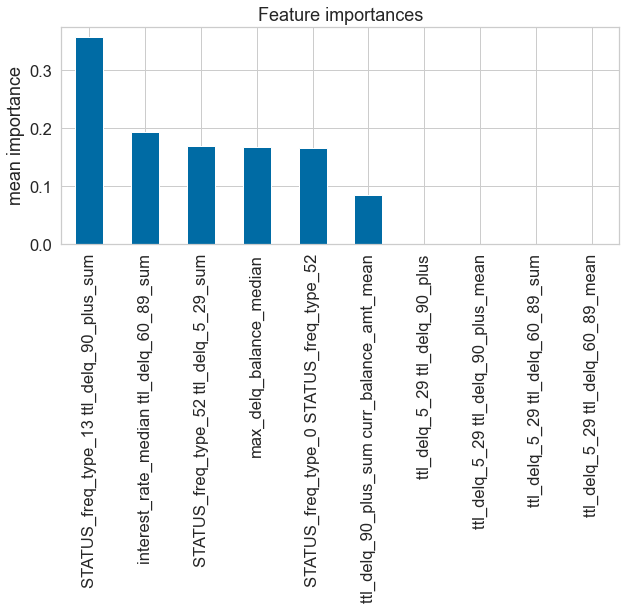

In [44]:
plt.style.use('tableau-colorblind10')
log_importances = pd.Series(abs(pipe_linreg[-1].coef_), index=lin_x_test.columns) \
                                 .sort_values(0, ascending=False)[:10]

fig, ax = plt.subplots(figsize=(10, 4))
log_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('mean importance')

In [45]:
pd.DataFrame(log_importances).head(10)

,0
STATUS_freq_type_13 ttl_delq_90_plus_sum,0.356859
interest_rate_median ttl_delq_60_89_sum,0.194387
STATUS_freq_type_52 ttl_delq_5_29_sum,0.170199
max_delq_balance_median,0.168488
STATUS_freq_type_0 STATUS_freq_type_52,0.166359
ttl_delq_90_plus_sum curr_balance_amt_mean,0.085187
ttl_delq_5_29 ttl_delq_90_plus,0.000000
ttl_delq_5_29 ttl_delq_90_plus_mean,0.000000
ttl_delq_5_29 ttl_delq_60_89_sum,0.000000
ttl_delq_5_29 ttl_delq_60_89_mean,0.000000


In [ ]:
# Аналогично c LinearRegression

# Если оценивать результаты по MSE или MAE, то ошибка очень большая
# при выборе 0 или 1, ошибка состовляет +-0.44 - очень много

# Для улучшения нужны коррелируемые с таргетом признаки

## 3.3 RandomForestClassifier

In [126]:
pipe_rforest = Pipeline(steps=[
            ('m', RandomForestClassifier(verbose=1, 
                                         n_jobs=-1,
                                         criterion='gini',
                                         n_estimators=300,
                                         max_depth=40))
])

pipe_rforest.fit(x_train_p, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.9s finished


Pipeline(steps=[('m',
                 RandomForestClassifier(max_depth=40, n_estimators=300,
                                        n_jobs=-1, verbose=1))])

In [127]:
get_report(pipe=pipe_rforest, x_test=x_test_p, y_test=y_test)
print()

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s


y_test -  Counter({0: 4985, 1: 4985})
predictions -  Counter({0: 5173, 1: 4797})

roc_auc_score - 0.9536
Gini -  0.9072

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4985
           1       0.90      0.86      0.88      4985

    accuracy                           0.88      9970
   macro avg       0.88      0.88      0.88      9970
weighted avg       0.88      0.88      0.88      9970




[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.1s finished


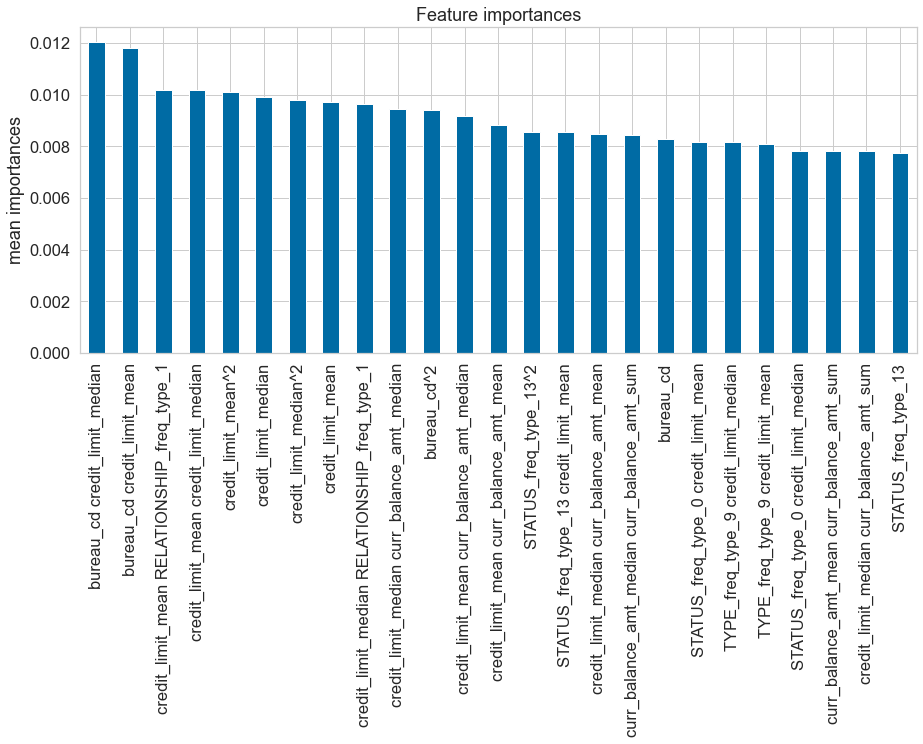

In [48]:
importances = pipe_rforest[-1].feature_importances_

forest_importances = pd.Series(importances, index=x_train_p.columns).sort_values(0, ascending=False)[:25]

fig, ax = plt.subplots(figsize=(15,6))
forest_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('mean importances')
plt.show()

In [50]:
pd.DataFrame(forest_importances).head(10)

,0
bureau_cd credit_limit_median,0.012028
bureau_cd credit_limit_mean,0.011818
credit_limit_mean RELATIONSHIP_freq_type_1,0.010200
credit_limit_mean credit_limit_median,0.010168
credit_limit_mean^2,0.010096
credit_limit_median,0.009922
credit_limit_median^2,0.009813
credit_limit_mean,0.009731
credit_limit_median RELATIONSHIP_freq_type_1,0.009636
credit_limit_median curr_balance_amt_median,0.009437


In [76]:
%%time
cv_pipe_rforest = cross_val_predict(pipe_rforest,
                                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                    X=x_train_p,
                                    y=y_train,
                                    verbose=10,
                                    n_jobs=-1,
                                    method='predict_proba')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.4s remaining:   32.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   21.4s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.5s finished


CPU times: total: 141 ms
Wall time: 21.8 s


In [77]:
print(f'auc score = {roc_auc_score(y_train, cv_pipe_rforest[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_train, cv_pipe_rforest[:, 1]) - 1) :.5f}')

auc score = 0.95154
Gini      = 0.90308


In [ ]:
# модель RandomForestClassifier показала высокие результаты по AUC - 0.9612,
# оценка через кросс-валидацию составила 0.95154

# Высокий результат

# Также, модель обучалась с PolynomialFeatures.
# несмотря на это, модель быстро обучается (5 секунд в среднем) и быстро дает прогнозы

## 3.4 LGBMClassifier

In [ ]:
# при помощи optuna посмотрим, можно ли достичь более высокую оценку, 
# чем у RandomForestClassifier

In [51]:
# функция, которую будем минимизировать

# мы задаем параметры и считаем logloss на тестовой выборке
# далее optuna будет минимизировать это значения (то есть повышать качество по AUC)
# также, внутри идет кросс-валидация с 5 фолдами
# для ускорения поиска используется callbcack для пропуска неудачных параметров

def objective(trial, x, y):
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 700, 1500, step=50),
        'max_depth': trial.suggest_int('max_depth', 4, 50, step=1),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.001, 0.9),
        'num_leaves': trial.suggest_int('num_leaves', 70, 150, step=10),
#         'num_leaves': trial.suggest_categorical('num_leaves', [30, 50, 80, 90]),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 30.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 30.0),
        }
    
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1881)
    train_scores = []
    test_scores = []
    losses = []
   
    for idx, (train_idx, test_idx) in enumerate( cv.split(x, y) ):
        x_tr, x_val = x.iloc[train_idx], x.iloc[test_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[test_idx]
        
        callback = optuna.integration.LightGBMPruningCallback(trial, 'binary_logloss')
        model = LGBMClassifier(n_jobs=-1, objective='binary', **params)
        
        model.fit(x_tr, 
                  y_tr, 
                  eval_set=[(x_val, y_val)],
                  eval_metric=['logloss'],
                  early_stopping_rounds=10, 
                  verbose=0,
                  callbacks=[callback]
                 )
    
        train_score_auc = roc_auc_score(y_tr, model.predict_proba(x_tr)[:, 1])
        train_score_gini = 2 * train_score_auc - 1
        
        test_score_auc = roc_auc_score(y_val, model.predict_proba(x_val)[:, 1])
        test_score_gini = 2 * test_score_auc - 1
        
        train_loss = log_loss(y_tr, model.predict_proba(x_tr))
        test_loss = log_loss(y_val, model.predict_proba(x_val))
        
        
        train_scores.append(train_score_auc)
        test_scores.append(test_score_auc)
        losses.append(test_loss)
        
    train_score = np.round(np.mean(train_scores), 6)
    test_score = np.round(np.mean(test_scores), 6)    
    loss = np.round(np.mean(losses), 6)
    
    
    print(f'TRAIN AUC : {train_score} || VAL AUC : {test_score} || VAL LOSS : {loss}')
    
    return loss

In [128]:
study = optuna.create_study(study_name='lightgbm_model', directions=['minimize'])
                                            
func = lambda trial: objective(trial=trial, x=x_train_p, y=y_train)

study.optimize(func, 
               n_trials=20, 
               n_jobs=-1,
               show_progress_bar=True)

[I 2023-03-22 15:08:21,274] A new study created in memory with name: lightgbm_model


  0%|          | 0/20 [00:00<?, ?it/s]

TRAIN AUC : 0.97725 || VAL AUC : 0.933041 || VAL LOSS : 0.321403
[I 2023-03-22 15:09:07,751] Trial 4 finished with value: 0.321403 and parameters: {'n_estimators': 1400, 'max_depth': 38, 'learning_rate': 0.8703868519785595, 'num_leaves': 80, 'reg_alpha': 1.8832071314211306e-05, 'reg_lambda': 2.3832393373839787e-05}. Best is trial 4 with value: 0.321403.
TRAIN AUC : 0.980493 || VAL AUC : 0.936836 || VAL LOSS : 0.311902
[I 2023-03-22 15:09:12,165] Trial 3 finished with value: 0.311902 and parameters: {'n_estimators': 1250, 'max_depth': 9, 'learning_rate': 0.813231316035306, 'num_leaves': 140, 'reg_alpha': 1.8666026764104483e-06, 'reg_lambda': 0.002171896161221884}. Best is trial 3 with value: 0.311902.
TRAIN AUC : 0.99265 || VAL AUC : 0.942285 || VAL LOSS : 0.300945
[I 2023-03-22 15:09:24,976] Trial 5 finished with value: 0.300945 and parameters: {'n_estimators': 700, 'max_depth': 45, 'learning_rate': 0.7340469599032243, 'num_leaves': 110, 'reg_alpha': 0.14674299587330933, 'reg_lambda': 

In [129]:
print('Best parameters:', study.best_params)
print()
print('Best log_loss value on test:', study.best_value)
print()
print()

model = LGBMClassifier(**study.best_params, n_jobs=-1)
model.fit(x_train_p, y_train, verbose=1)

Best parameters: {'n_estimators': 750, 'max_depth': 40, 'learning_rate': 0.14405083929000317, 'num_leaves': 120, 'reg_alpha': 5.296864821075896e-05, 'reg_lambda': 1.1153600544953696e-05}

Best log_loss value on test: 0.255064




LGBMClassifier(learning_rate=0.14405083929000317, max_depth=40,
               n_estimators=750, num_leaves=120,
               reg_alpha=5.296864821075896e-05,
               reg_lambda=1.1153600544953696e-05)

In [54]:
print(f'auc score TRAIN = {roc_auc_score(y_train, model.predict_proba(x_train_p)[:, 1]):.5f}')
print(f'Gini TRAIN     = { (2 * roc_auc_score(y_train, model.predict_proba(x_train_p)[:, 1]) - 1) :.5f}')
print()
print(f'auc score TEST  = {roc_auc_score(y_test, model.predict_proba(x_test_p)[:, 1]):.5f}')
print(f'Gini TEST      = { (2 * roc_auc_score(y_test, model.predict_proba(x_test_p)[:, 1]) - 1) :.5f}')

auc score TRAIN = 0.99997
Gini TRAIN     = 0.99994

auc score TEST  = 0.94544
Gini TEST      = 0.89088


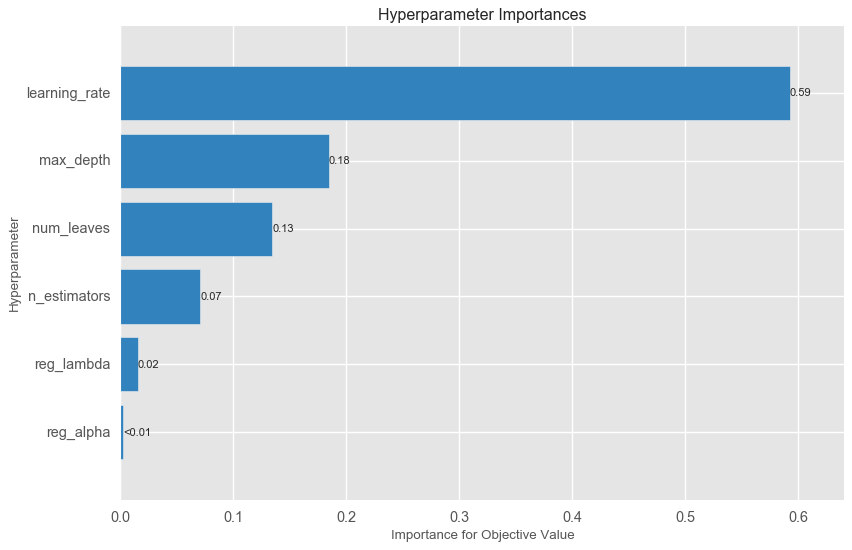

In [111]:
plt.style.use('tableau-colorblind10')
optuna.visualization.matplotlib.plot_param_importances(study)
plt.show() # график, от каких параметров больше всего зависит качество модели

Text(0, 0.5, 'mean importance')

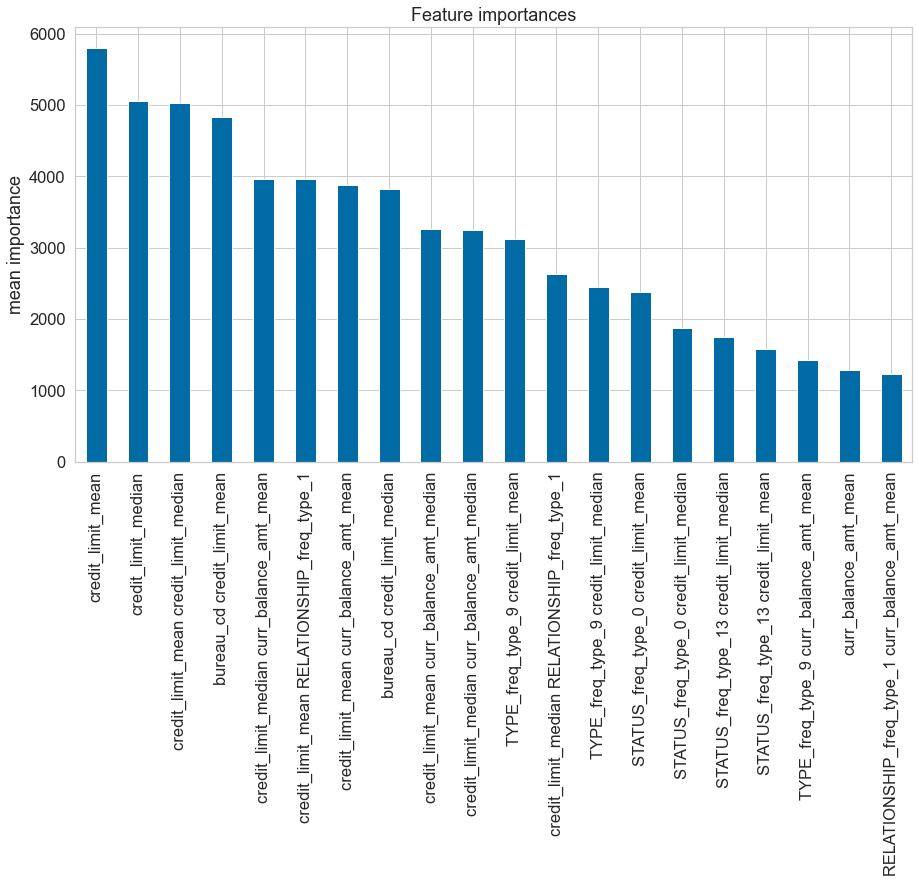

In [55]:
plt.style.use('tableau-colorblind10')
importances_lgbm = model.feature_importances_
lgbm_importances = pd.Series(importances_lgbm, index=x_train_p.columns).sort_values(0, ascending=False)[:20]

fig, ax = plt.subplots(figsize=(15,8))
lgbm_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('mean importance')

In [56]:
pd.DataFrame(lgbm_importances).head(10)

,0
credit_limit_mean,5803
credit_limit_median,5062
credit_limit_mean credit_limit_median,5033
bureau_cd credit_limit_mean,4838
credit_limit_median curr_balance_amt_mean,3969
credit_limit_mean RELATIONSHIP_freq_type_1,3960
credit_limit_mean curr_balance_amt_mean,3881
bureau_cd credit_limit_median,3829
credit_limit_mean curr_balance_amt_median,3265
credit_limit_median curr_balance_amt_median,3241


In [ ]:
# получились тоже высокии результаты, как и у RandomForestClassifier
# результаты примерно такие же - 0.95494

## 3.5 XGBClassifier

In [131]:
# не используем optuna, так как модель требует больше памяти - ошибка 'out off memory'
# (слишком много признаков подается на обучение)

pipe_xgb_cls = Pipeline(steps=[('scaler', MinMaxScaler()), 
                               ('model', XGBClassifier(tree_method='gpu_hist',
                                                       objective='binary:logistic',
                                                       learning_rate=0.5,
                                                       n_estimators=50,
                                                       reg_lambda=25,
                                                       max_depth=30))])

pipe_xgb_cls.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=30, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [132]:
get_report(pipe=pipe_xgb_cls, x_test=x_test, y_test=y_test)
print()

y_test -  Counter({0: 4985, 1: 4985})
predictions -  Counter({0: 5258, 1: 4712})

roc_auc_score - 0.9621
Gini -  0.9241

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4985
           1       0.94      0.88      0.91      4985

    accuracy                           0.91      9970
   macro avg       0.91      0.91      0.91      9970
weighted avg       0.91      0.91      0.91      9970




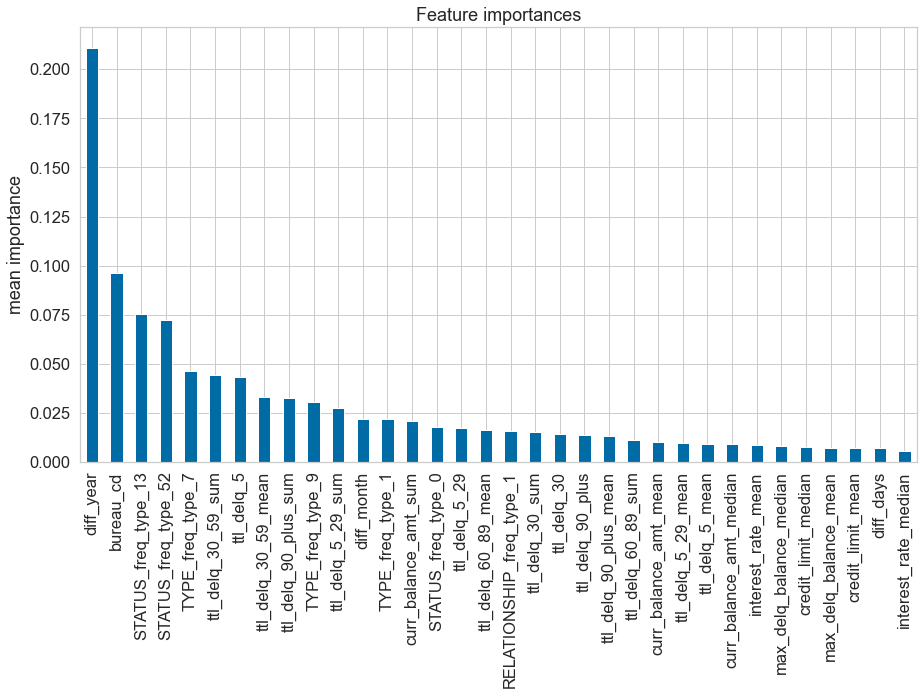

In [59]:
importances = pipe_xgb_cls[-1].feature_importances_

xgb_importances = pd.Series(importances, index=x_train.columns).sort_values(0, ascending=False)

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(15,8))
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('mean importance')
plt.show()

In [60]:
pd.DataFrame(xgb_importances).sort_values(by=0, ascending=False).head(10)

,0
diff_year,0.210959
bureau_cd,0.096369
STATUS_freq_type_13,0.075305
STATUS_freq_type_52,0.072046
TYPE_freq_type_7,0.046063
ttl_delq_30_59_sum,0.044072
ttl_delq_5,0.043353
ttl_delq_30_59_mean,0.033299
ttl_delq_90_plus_sum,0.032618
TYPE_freq_type_9,0.030277


In [125]:
cv_xgb_cls = cross_val_predict(pipe_xgb_cls,
                                    cv=StratifiedKFold(n_splits=5, shuffle=True),
                                    X=x_train,
                                    y=y_train,
                                    verbose=10,
                                    n_jobs=-1,
                                    method='predict_proba')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    8.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished


In [126]:
print(f'auc score = {roc_auc_score(y_train, cv_xgb_cls[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_train, cv_xgb_cls[:, 1]) - 1) :.5f}')

auc score = 0.95596
Gini      = 0.91192


In [ ]:
# Аналогично RandomForestClassifier и LGBMClassifier - AUC=0.95596
# Результаты трех моделей были 0.95-0.96

## 3.6 CatBoost

In [120]:
from catboost import CatBoostClassifier, cv, Pool, MetricVisualizer
from catboost.utils import select_threshold, get_roc_curve, get_fpr_curve, get_fnr_curve
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures

In [121]:
x_train_cat = MinMaxScaler().fit_transform(x_train)
x_test_cat = MinMaxScaler().fit_transform(x_test)

x_train_cat = pd.DataFrame(x_train_cat, columns=x_train.columns)
x_test_cat = pd.DataFrame(x_test_cat, columns=x_train.columns)

In [122]:
model_catboost_cls = CatBoostClassifier(
    loss_function='Logloss', custom_loss='AUC', eval_metric='AUC',
    learning_rate=0.01, iterations=5000,
    l2_leaf_reg=10, random_strength=101, depth=8,
)

m = model_catboost_cls.fit(x_train_cat, y_train, eval_set=(x_test_cat, y_test),
                       verbose=500, plot=True, early_stopping_rounds=200)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6524647	best: 0.6524647 (0)	total: 26.5ms	remaining: 2m 12s
500:	test: 0.8054653	best: 0.8054653 (500)	total: 11.3s	remaining: 1m 41s
1000:	test: 0.8558693	best: 0.8558693 (1000)	total: 22.3s	remaining: 1m 29s
1500:	test: 0.9336102	best: 0.9336102 (1500)	total: 33.4s	remaining: 1m 17s
2000:	test: 0.9454691	best: 0.9454691 (2000)	total: 45.2s	remaining: 1m 7s
2500:	test: 0.9481788	best: 0.9482016 (2495)	total: 57s	remaining: 56.9s
3000:	test: 0.9495964	best: 0.9495978 (2999)	total: 1m 9s	remaining: 46.1s
3500:	test: 0.9504576	best: 0.9504865 (3480)	total: 1m 21s	remaining: 34.7s
4000:	test: 0.9513298	best: 0.9513298 (4000)	total: 1m 33s	remaining: 23.3s
4500:	test: 0.9517698	best: 0.9517698 (4500)	total: 1m 45s	remaining: 11.7s
4999:	test: 0.9521063	best: 0.9521063 (4999)	total: 1m 58s	remaining: 0us

bestTest = 0.9521062687
bestIteration = 4999



In [64]:
print(f'auc score TRAIN = {roc_auc_score(y_train, model_catboost_cls.predict_proba(x_train_cat)[:, 1]):.5f}')
print(f'Gini TRAIN      = { (2 * roc_auc_score(y_train, model_catboost_cls.predict_proba(x_train_cat)[:, 1]) - 1) :.5f}')
print()
print(f'auc score TEST  = {roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]):.5f}')
print(f'Gini TEST       = { (2 * roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]) - 1) :.5f}')

auc score TRAIN = 0.98155
Gini TRAIN      = 0.96309

auc score TEST  = 0.95208
Gini TEST       = 0.90417


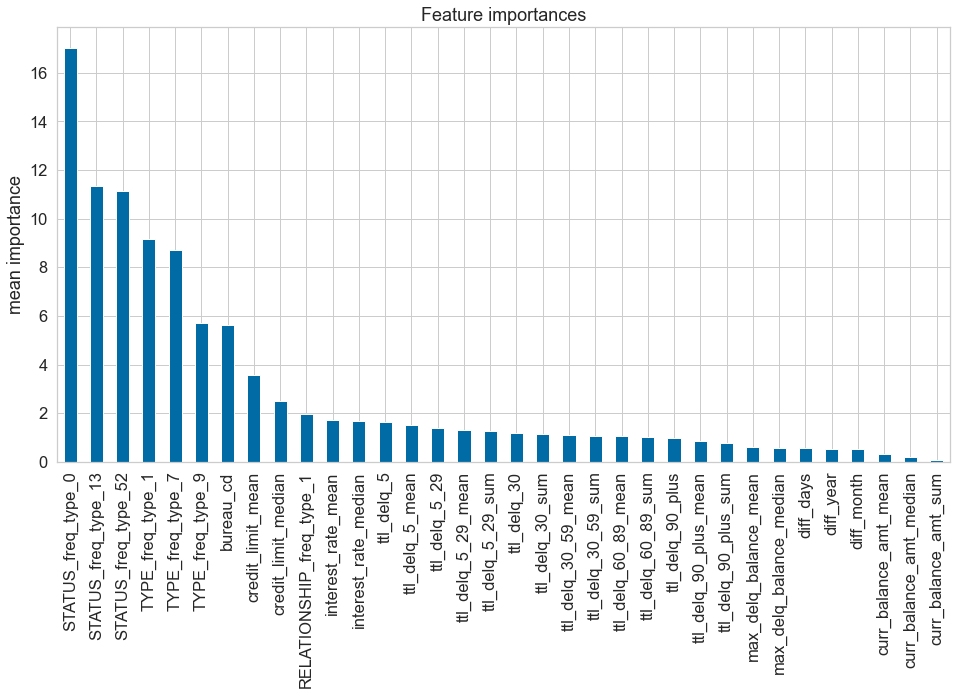

In [65]:
plt.style.use('tableau-colorblind10')
cat_features = pd.DataFrame(model_catboost_cls.get_feature_importance(prettified=True))

skl_iris_imp = pd.Series(cat_features.Importances.values,
                         x_train.columns)

fig, ax = plt.subplots(figsize=(16, 8))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('mean importance')
plt.show()

In [66]:
pd.DataFrame(skl_iris_imp).head(10)

,0
STATUS_freq_type_0,17.026516
STATUS_freq_type_13,11.359447
STATUS_freq_type_52,11.144873
TYPE_freq_type_1,9.150962
TYPE_freq_type_7,8.698176
TYPE_freq_type_9,5.719434
bureau_cd,5.612470
credit_limit_mean,3.588611
credit_limit_median,2.519147
RELATIONSHIP_freq_type_1,1.953390


График потерь

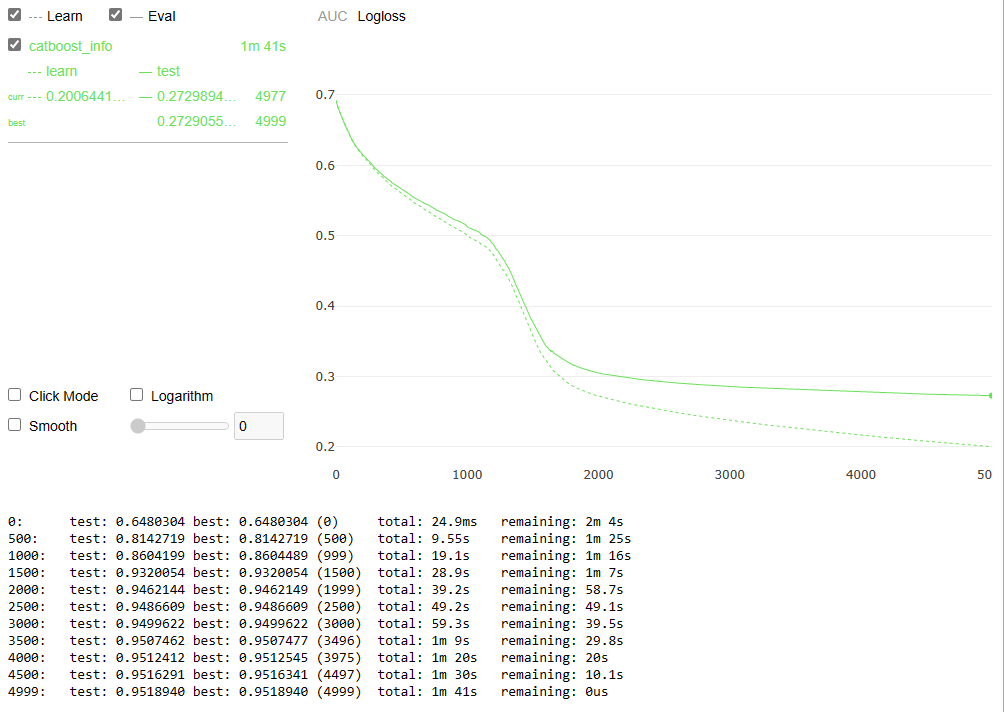

график AUC
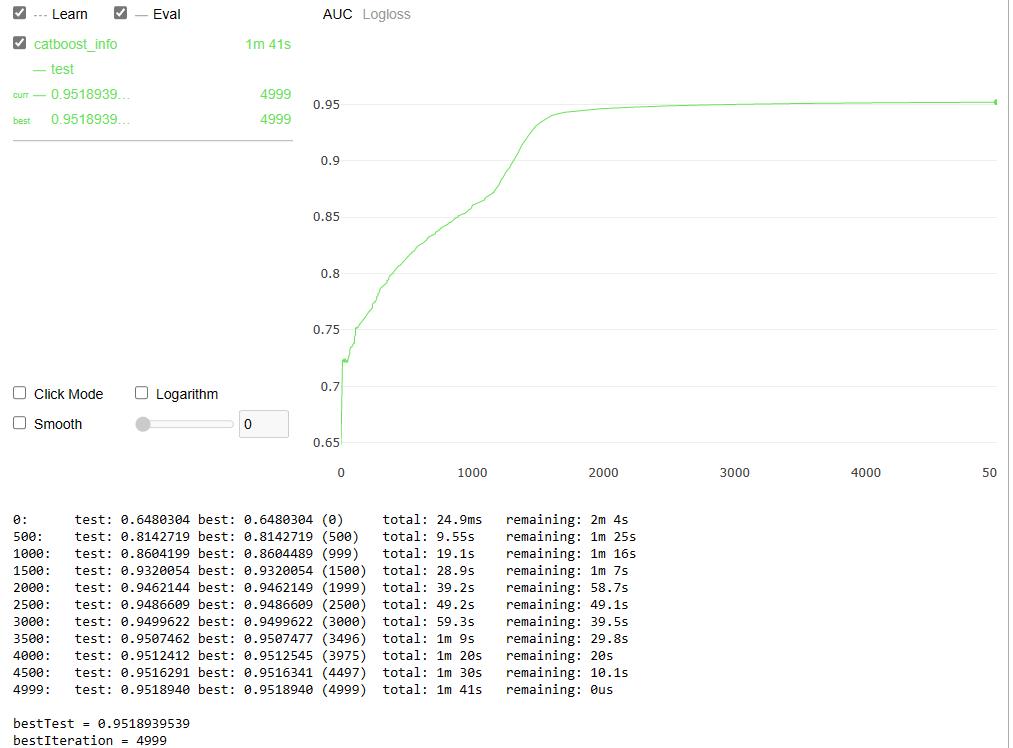

In [67]:
print(f'auc score = {roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]):.5f}')
print(f'Gini      = { (2 * roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]) - 1) :.5f}')

auc score = 0.95208
Gini      = 0.90417


In [ ]:
# модель, как и остальные бустинги, показывает хорошее качетсво
# есть небольшое недообучение, но если смотреть по графику AUC - качество достигло максимума - 0.95189
# на train-0.98, на test=0.95 

# у LGBMClassifier, например, почти 1 на train, сильнее недообучение

## 3.7 NN

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x_imb, y_imb, stratify=y_imb, test_size=0.25, )


x_train_sc = MinMaxScaler().fit_transform(x_train)
x_test_sc = MinMaxScaler().fit_transform(x_test)

x_train_sc.shape, y_train.shape, x_test_sc.shape, y_test.shape

((29845, 34), (29845,), (9949, 34), (9949,))

In [ ]:
# структура модели
model = Sequential()

model.add(Dense(units = 500, input_shape = (x_train_sc.shape[1],), activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

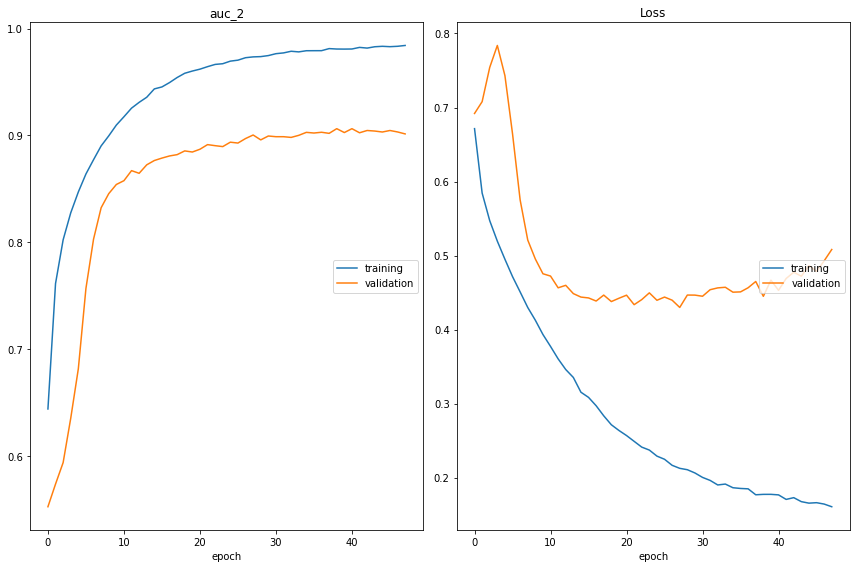

auc_2
	training         	 (min:    0.644, max:    0.984, cur:    0.984)
	validation       	 (min:    0.552, max:    0.906, cur:    0.901)
Loss
	training         	 (min:    0.161, max:    0.671, cur:    0.161)
	validation       	 (min:    0.430, max:    0.784, cur:    0.508)
22422/22422 [==============================] - 1s 44us/sample - loss: 0.1606 - auc_2: 0.9843 - val_loss: 0.5081 - val_auc_2: 0.9015



In [91]:
cp = ModelCheckpoint('model/', save_best_only=True)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.0008, nesterov=True), metrics=[keras.metrics.AUC()])
# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=[keras.metrics.AUC()])

model.compile(loss=keras.losses.BinaryCrossentropy(), 
              optimizer=keras.optimizers.legacy.Adam(learning_rate=0.00005), 
              metrics=[keras.metrics.AUC()]
              )

history = model.fit(x_train_sc, 
                    y_train, 
                    validation_split = 0.25, 
                    batch_size=256, 
                    epochs=100, 
                    verbose=1,
                    callbacks=[cp, PlotLossesKeras(), callback])
                                 

print('\n ==============')

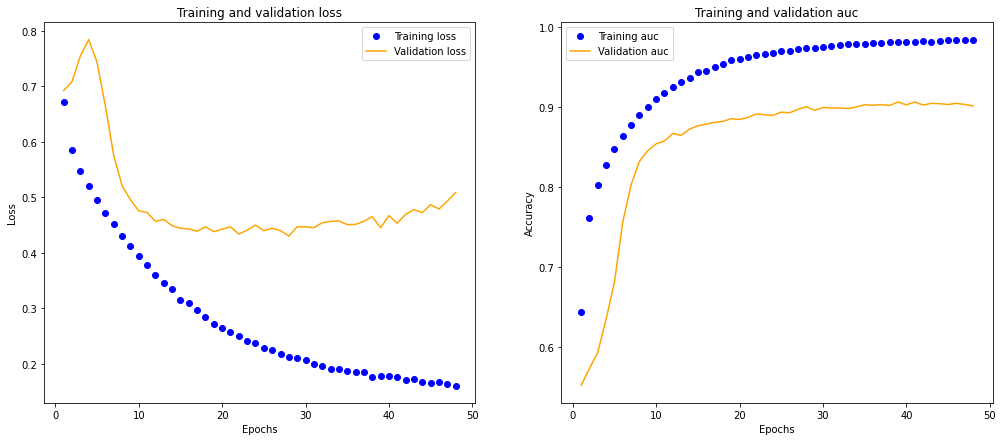


Best auc score: 0.9063808917999268


In [92]:
plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
acc = history.history[list(history.history.keys())[1]]
val_acc = history.history[list(history.history.keys())[3]]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training auc')
plt.plot(epochs, val_acc, 'orange', label='Validation auc')
plt.title('Training and validation auc')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

print()
print(f'Best auc score: {np.max(val_acc)}')

plt.show()

In [93]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, auc, roc_curve

model = load_model('model/')

predictions = model.predict(x_test_sc, batch_size=128)
predictions = np.round(predictions.ravel(), 0)

print()
print(f'auc(fpr, tpr): {auc(roc_curve(y_test, predictions)[0], roc_curve(y_test, predictions)[1]):.4f}' )
print()
print(classification_report(y_test, predictions))


auc(fpr, tpr): 0.8233

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4983
           1       0.81      0.85      0.83      4983

    accuracy                           0.82      9966
   macro avg       0.82      0.82      0.82      9966
weighted avg       0.82      0.82      0.82      9966



In [ ]:
# в целом, результаты схожи с логистической регрессией

# есть недообучение, но по графику AUC видно, что концентрация значений начинает увеличиваться
# это значит, что локальный максимум возможно найден 
# (график похож на AUC CatBoost - тоже выходит в прямую линию)

# 4. Результаты

## 4.1 Таблица результатов

In [133]:
da = [
      ['LogisticRegression',
       roc_auc_score(y_test, pipe_logreg.predict_proba(lin_x_test)[:, 1]),
       2 * roc_auc_score(y_test, pipe_logreg.predict_proba(lin_x_test)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(pipe_logreg.predict(lin_x_test), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(pipe_logreg.predict(lin_x_test), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(pipe_logreg.predict(lin_x_test), 0), average='weighted')[2]],
      
      ['LinearRegression',
       0,
       0,
       precision_recall_fscore_support(y_test, np.round(pipe_linreg.predict(lin_x_test), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(pipe_linreg.predict(lin_x_test), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(pipe_linreg.predict(lin_x_test), 0), average='weighted')[2]],
      
      ['RandomForestClassifier',
       roc_auc_score(y_test, pipe_rforest.predict_proba(x_test_p)[:, 1]),
       2 * roc_auc_score(y_test, pipe_rforest.predict_proba(x_test_p)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(pipe_rforest.predict(x_test_p), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(pipe_rforest.predict(x_test_p), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(pipe_rforest.predict(x_test_p), 0), average='weighted')[2]],
      
      ['LGBMClassifier',
       roc_auc_score(y_test, model.predict_proba(x_test_p)[:, 1]),
       2 * roc_auc_score(y_test, model.predict_proba(x_test_p)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(model.predict(x_test_p), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(model.predict(x_test_p), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(model.predict(x_test_p), 0), average='weighted')[2]],
      
      ['XGBClassifier',
       roc_auc_score(y_test, pipe_xgb_cls.predict_proba(x_test)[:, 1]),
       2 * roc_auc_score(y_test, pipe_xgb_cls.predict_proba(x_test)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(pipe_xgb_cls.predict(x_test), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(pipe_xgb_cls.predict(x_test), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(pipe_xgb_cls.predict(x_test), 0), average='weighted')[2]],
 
      ['CatBoostClassifier',
       roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1]),
       2 * roc_auc_score(y_test, model_catboost_cls.predict_proba(x_test_cat)[:, 1])-1,
       precision_recall_fscore_support(y_test, np.round(model_catboost_cls.predict(x_test_cat), 0), average='weighted')[0],
       precision_recall_fscore_support(y_test, np.round(model_catboost_cls.predict(x_test_cat), 0), average='weighted')[1],
       precision_recall_fscore_support(y_test, np.round(model_catboost_cls.predict(x_test_cat), 0), average='weighted')[2]],

      ['NN',
       0.8233,
       2 * 0.8233 - 1,
       0.82,
       0.82,
       0.82], 
      
      ['LightAutoMl',
       roc_auc_score(y_test_auto, automl.predict(x_test_auto).data[:, 0]),
       2 * roc_auc_score(y_test_auto, automl.predict(x_test_auto).data[:, 0])-1,
       precision_recall_fscore_support(y_test_auto, np.round(automl.predict(x_test_auto).data[:, 0], 0), average='weighted')[0],
       precision_recall_fscore_support(y_test_auto, np.round(automl.predict(x_test_auto).data[:, 0], 0), average='weighted')[1],
       precision_recall_fscore_support(y_test_auto, np.round(automl.predict(x_test_auto).data[:, 0], 0), average='weighted')[2]],      
]

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      |

In [134]:
result = pd.DataFrame(da, columns=['Model', 'AUC', 'GINI', 'PRECISION', 'RECALL', 'FSCORE']).set_index('Model')

result.sort_values(by='GINI', ascending=False)\
.style.background_gradient(cmap=sns.light_palette('darkblue', as_cmap=True), vmin=0.81)

,AUC,GINI,PRECISION,RECALL,FSCORE
Model,,,,,
XGBClassifier,0.962069,0.924138,0.912471,0.911234,0.911167
RandomForestClassifier,0.953579,0.907158,0.883595,0.883049,0.883008
LightAutoMl,0.953412,0.906825,0.917429,0.914131,0.913962
CatBoostClassifier,0.952106,0.904213,0.883422,0.883149,0.883129
LGBMClassifier,0.946074,0.892149,0.881562,0.879539,0.879379
NN,0.823300,0.646600,0.820000,0.820000,0.820000
LogisticRegression,0.820418,0.640836,0.741252,0.741123,0.741089
LinearRegression,0.000000,0.000000,0.581341,0.561886,0.534022


> Лучше всего показала себя модель **RandomForestClassifier**, но остальные бустинги примерно схожи 

> Также, LightAutoMl обучилась хорошо. Сама LightAutoMl состоит из двух LGBMClassifier-моделей

> У моделей RandomForestClassifier, LGBMClassifier и XGBClassifier показывают одинаковые результаты - 0.95-0.95

NN и LogisticRegression схожи по AUC

## 4.2 Настройка лучшей модели

In [78]:
# Лучшая модель - RandomForestClassifier

get_report(pipe=pipe_rforest, x_test=x_test_p, y_test=y_test)
print() 

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s


y_test -  Counter({0: 4975, 1: 4974})
predictions -  Counter({0: 5421, 1: 4528})

roc_auc_score - 0.9515
Gini -  0.9031

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4975
           1       0.92      0.84      0.88      4974

    accuracy                           0.88      9949
   macro avg       0.89      0.88      0.88      9949
weighted avg       0.89      0.88      0.88      9949




[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.1s finished


In [79]:
predictions_proba = pipe_rforest.predict_proba(x_test_p)[:, 1]
print('AUC on test:', roc_auc_score(y_test, predictions_proba))

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s


AUC on test: 0.951537947073526


[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.1s finished


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    0.1s finished


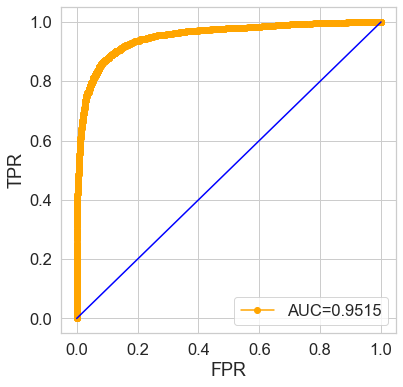

In [94]:
from sklearn.metrics import roc_curve

y_pred = pipe_rforest.predict_proba(x_test_p)[:, 1]
fpr, tpr, threshhold = roc_curve(y_test, y_pred, drop_intermediate=False)
auc = round(roc_auc_score(y_test, y_pred), 4)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='AUC=' + str(auc), color='orange', marker='o')
plt.plot([1, 0], [1, 0], color='blue')
plt.legend(loc='lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Optimal threshhold: 0.4565834480457181


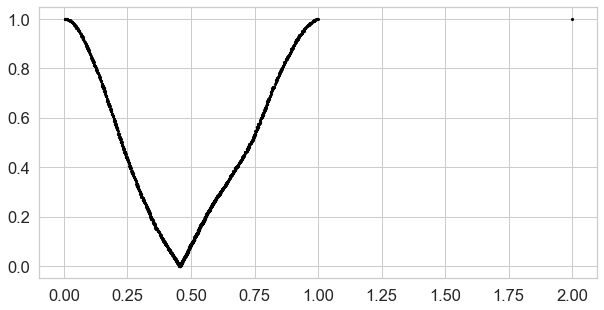

In [103]:
plt.figure(figsize=(10, 5))
plt.scatter(x=threshhold, y=abs(fpr+tpr-1), s=10, c='black', linewidth=0)

print('Optimal threshhold:', threshhold[np.argmin(np.abs(fpr+tpr-1))])

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_y_pred = np.where(y_pred > 0.5, 1, 0)

cm = confusion_matrix(y_test, cm_y_pred, labels=[0, 1])

# confusion_matrix basic
cm

array([[4619,  356],
       [ 802, 4172]], dtype=int64)

In [102]:
cm_y_pred = np.where(y_pred > 0.4565834480457181, 1, 0)

cm = confusion_matrix(y_test, cm_y_pred, labels=[0, 1])

# confusion_matrix with threshhold=0.4565834480457181
cm

array([[4415,  560],
       [ 561, 4413]], dtype=int64)

## 4.3 Выводы

**Способы улучшения моделей:**

*Способы именно для этого датасета

> В целом, не было сильной разницы в метриках после использования optuna: RandomForestClassifier с базовыми параметрами обучается так же, как и LGBMClassifier + optuna

> Линейная и логистическая регрессии должны улавливать линейную зависимость с таргетом для высоких результатов. Для этого надо или выбирать только такие признаки, или создавать новые из имеющихся. Использование PolynomialFeatures подняло с 0.71 до 0.82 AUC, но сама корреляция с таргетом была меньше 0.1

> Стоит отметить методы undersampling и oversampling для балансировки классов. В прошлом датасете было много строк, там логично было бы использовать undersampling, но падало качество. В этой работе 24_000 строк - мало, увеличение до 40_000
оказало положительный эффект. В AutoML качество поднялось с 0.71 до 0.95

> Добавление новых признаков. В новом датасете использовались средние, медианные значения, суммы признаков. На графиках важности признаков видно, что они тоже влияют на оценку

> Очистка данных. Например, в столбце процентной ставки много значений 0%. Удалять их - терять данные (уже 24_00 строк),
заполнять средним или медианой - у каждого клиета разные кредиты